In [1]:
install.packages(c('TSA', 'tseries', 'itsmr', 'forecast', 'astsa', 'lmtest'))

library(TSA)
library(tseries)
library(itsmr)
library(forecast)
library(astsa)
library(lmtest)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘leaps’, ‘locfit’, ‘quadprog’, ‘zoo’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’



Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘itsmr’


The following object is masked from ‘package:tseries’:

    arma


The following objects are masked from ‘package:TSA’:

    periodogram, season


Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 


Attaching package: ‘forecast’


The following object is masked from ‘package:itsmr’:

    forecast



Attaching package: ‘astsa’


The following object is masked from ‘package:forecast’:

    gas


The f

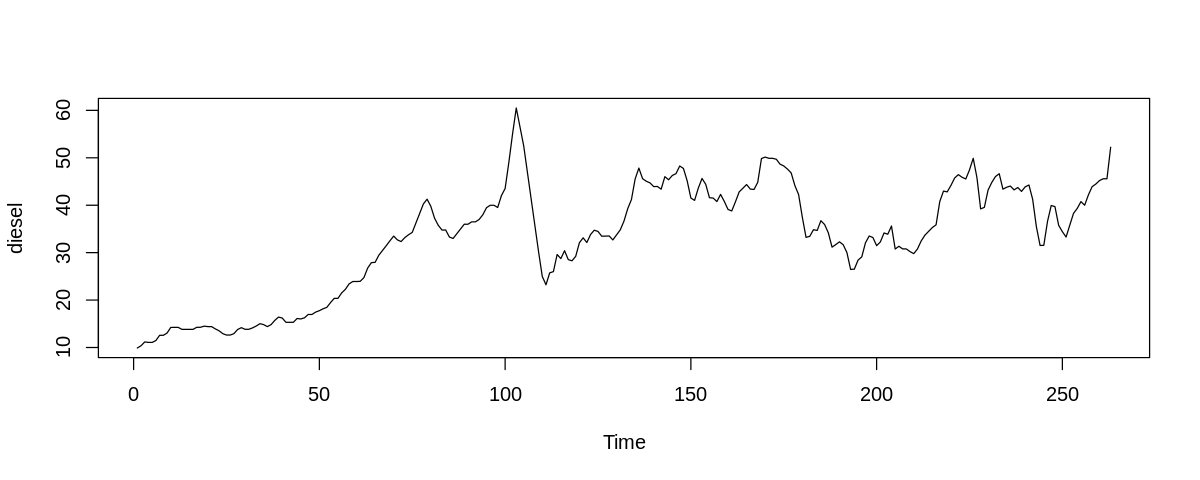

In [2]:
fuel = read.csv('fuel_jan00.csv')
gasoline = ts(fuel$Gasoline)
diesel = ts(fuel$Diesel)
kerosene = ts(fuel$Kerosene)
lpg = ts(fuel$LPG)

options(repr.plot.width = 10, repr.plot.height = 4)
plot(diesel)
#plot(decompose(gasoline))

In [3]:
diesel = na.omit(diesel)
adf.test(diesel)
Box.test(diesel, type="Ljung")


	Augmented Dickey-Fuller Test

data:  diesel
Dickey-Fuller = -2.8088, Lag order = 6, p-value = 0.2353
alternative hypothesis: stationary



	Box-Ljung test

data:  diesel
X-squared = 251.8, df = 1, p-value < 2.2e-16


In [4]:
diesel.d = diff(diesel, d=1)

adf.test(diesel.d)
Box.test(diesel.d, type="Ljung")

Warning message in adf.test(diesel.d):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diesel.d
Dickey-Fuller = -6.0224, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary



	Box-Ljung test

data:  diesel.d
X-squared = 58.004, df = 1, p-value = 2.62e-14


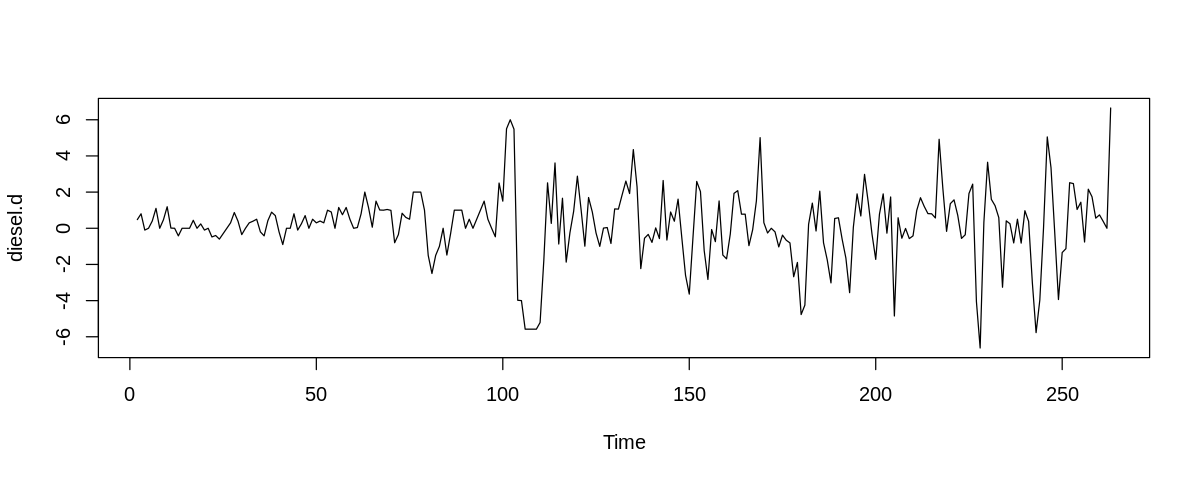

In [5]:
plot(diesel.d)

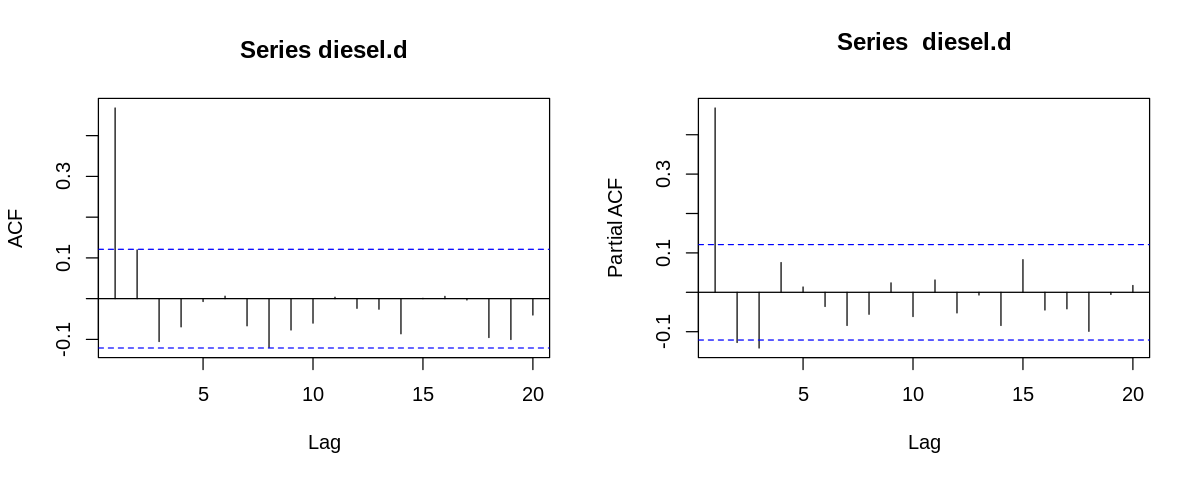

In [6]:
par(mfrow=c(1,2))
acf(diesel.d, lag=20)
#axis(side=1, at=seq(0, 100, by=1))
pacf(diesel.d, lag=20)
#axis(side=1, at=seq(0, 100, by=1))

In [7]:
fit6 = Arima(diesel, order=c(3,1,0))
summary(fit6)
coeftest(fit6)

Series: diesel 
ARIMA(3,1,0) 

Coefficients:
         ar1      ar2      ar3
      0.5415  -0.0686  -0.1372
s.e.  0.0629   0.0717   0.0628

sigma^2 = 2.877:  log likelihood = -508.89
AIC=1025.78   AICc=1025.94   BIC=1040.06

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.1151489 1.683329 1.192062 0.3792781 3.511309 0.8935691
                   ACF1
Training set 0.01080793


z test of coefficients:

     Estimate Std. Error z value Pr(>|z|)    
ar1  0.541513   0.062941  8.6035  < 2e-16 ***
ar2 -0.068580   0.071663 -0.9570  0.33858    
ar3 -0.137195   0.062769 -2.1857  0.02884 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



	Box-Ljung test

data:  resid
X-squared = 0.031073, df = 1, p-value = 0.8601


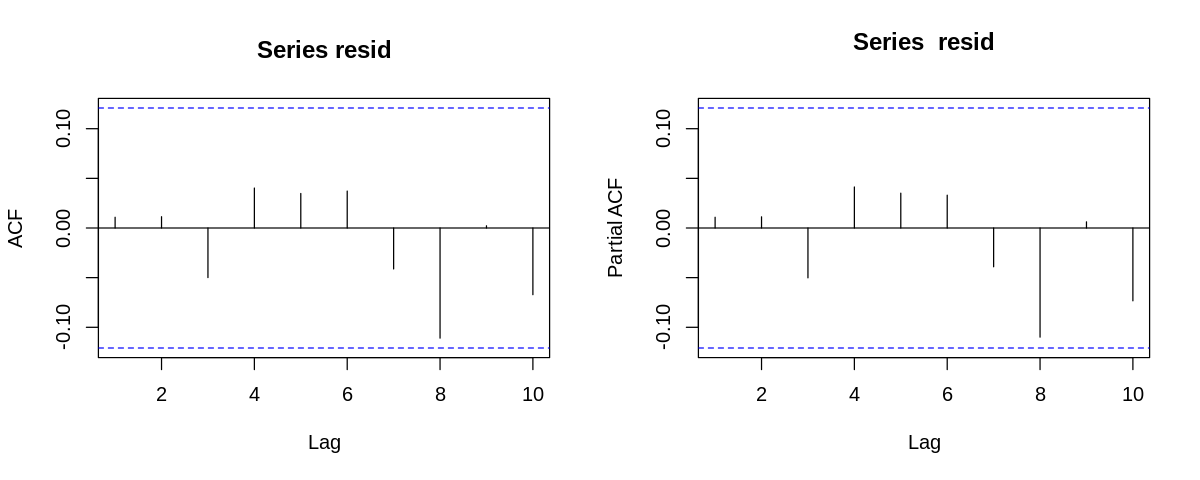

In [8]:
resid = residuals(fit6)

Box.test(resid, type="Ljung")

par(mfrow=c(1,2))
acf(resid, lag=10)
pacf(resid, lag=10)



	Box-Ljung test

data:  resid^2
X-squared = 11.115, df = 1, p-value = 0.0008562


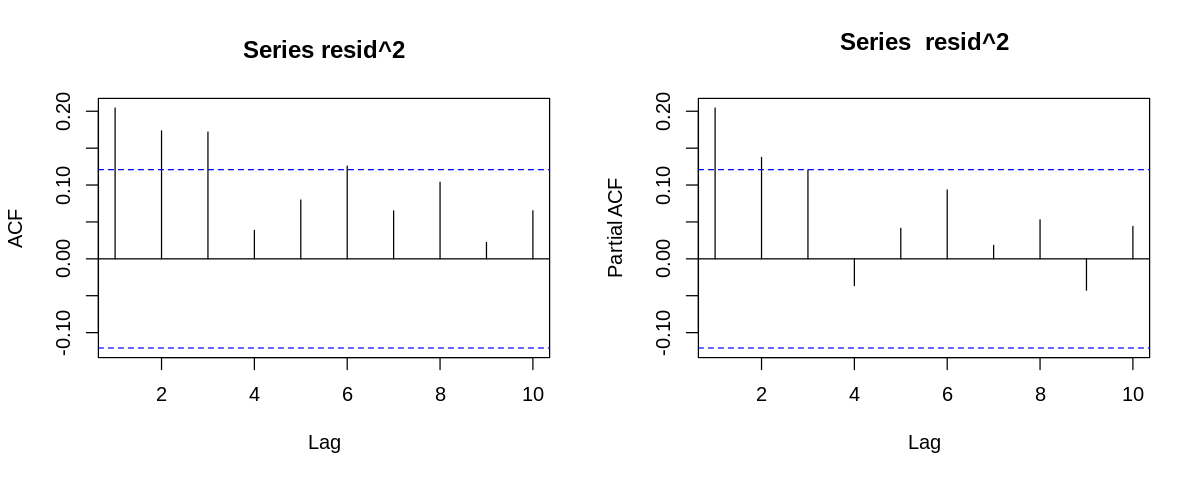

In [9]:
par(mfrow=c(1,2))
acf(resid^2, lag=10)
#axis(side=1, at=seq(0, 100, by=1))

pacf(resid^2, lag=10)
#axis(side=1, at=seq(0, 100, by=1))

Box.test(resid^2, type="Ljung")

In [14]:
#install.packages("rugarch")
library(rugarch)

spec <- ugarchspec(
  variance.model = list(model = "sGARCH", garchOrder = c(1,1)),
  mean.model = list(armaOrder = c(3,0), include.mean = FALSE),
  distribution.model = "norm"
)

fit_check <- ugarchfit(spec = spec, data = diesel.d)

In [15]:
show(fit_check)


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(3,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
ar1     0.525813    0.069618  7.55285 0.000000
ar2    -0.033217    0.081638 -0.40688 0.684096
ar3    -0.122755    0.070044 -1.75253 0.079683
omega   0.024723    0.019039  1.29856 0.194096
alpha1  0.119906    0.024044  4.98686 0.000001
beta1   0.879094    0.022863 38.45075 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
ar1     0.525813    0.072710  7.23162 0.000000
ar2    -0.033217    0.103435 -0.32114 0.748106
ar3    -0.122755    0.082668 -1.48491 0.137567
omega   0.024723    0.031464  0.78577 0.432003
alpha1  0.119906    0.034984  3.42751 0.000609
beta1   0.879094    0.041732 21.06528 0.000000

LogLike

In [16]:
spec <- ugarchspec(
  variance.model = list(model = "sGARCH", garchOrder = c(1,1)),
  mean.model = list(armaOrder = c(1,0), include.mean = FALSE),
  distribution.model = "norm"
)

fit_check <- ugarchfit(spec = spec, data = diesel.d)

In [17]:
show(fit_check)


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
ar1     0.484394    0.057242   8.4623  0.00000
omega   0.022722    0.017403   1.3057  0.19167
alpha1  0.124245    0.023577   5.2697  0.00000
beta1   0.874755    0.022400  39.0515  0.00000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
ar1     0.484394    0.050490  9.59384 0.000000
omega   0.022722    0.026383  0.86124 0.389105
alpha1  0.124245    0.034650  3.58573 0.000336
beta1   0.874755    0.040119 21.80397 0.000000

LogLikelihood : -474.9312 

Information Criteria
------------------------------------
                   
Akaike       3.6560
Bayes        3.7104
Shibata      3.6555
Hannan-Quinn 3.6779

Weighted

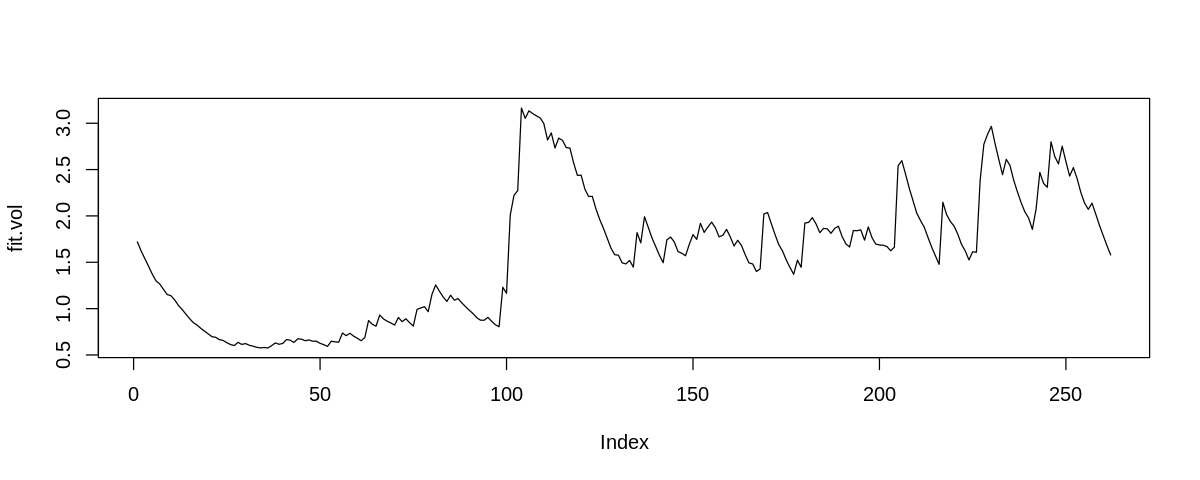

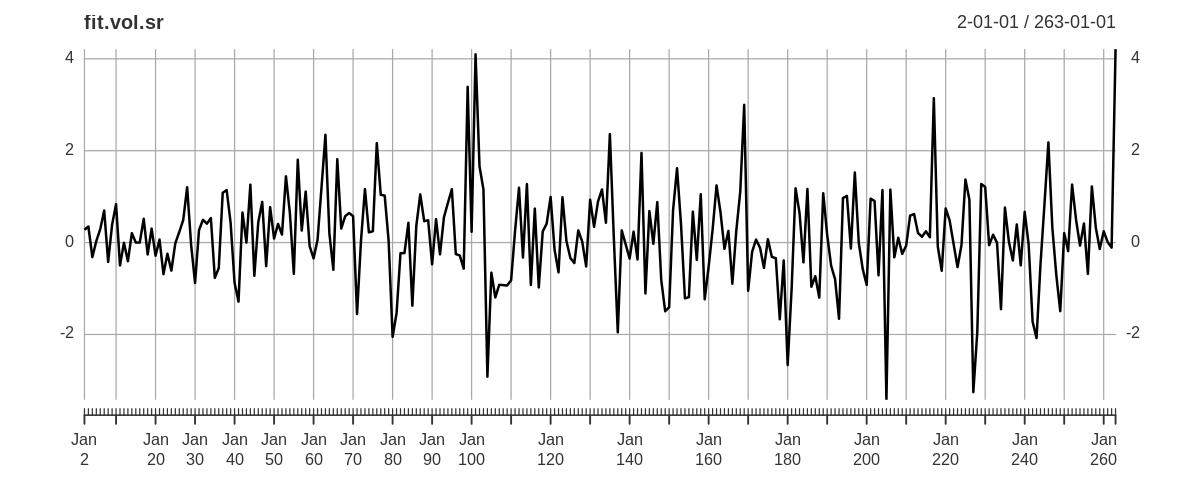

In [18]:
# extract volatility from the fitted rugarch object
fit.vol = fit_check@fit$sigma
fit.vol.sr = residuals(fit_check) / fit_check@fit$sigma
plot(fit.vol, type="l")
plot(fit.vol.sr, type="l")

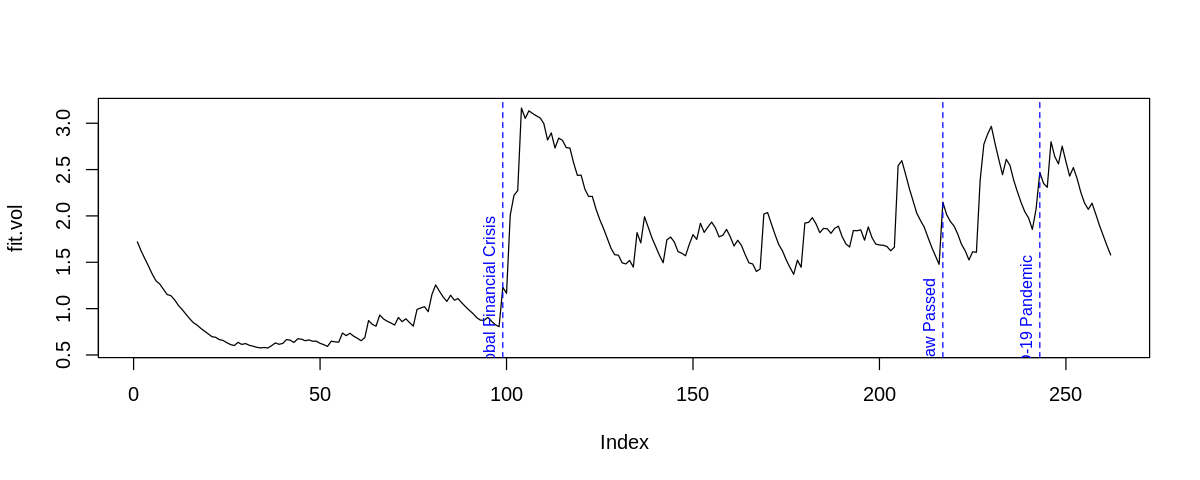

In [19]:
plot(fit.vol, type = "l")

# Add vertical line at x = 130
abline(v = 99, col = "blue", lty = 2)

# Add vertical text annotation
text(x = 99, y = 2, labels = "Global Financial Crisis",
     pos = 2, srt = 90, col = "blue", cex = 0.8)

# Add vertical line at x = 130
abline(v = 243, col = "blue", lty = 2)

# Add vertical text annotation
text(x = 243, y = min(fit.vol)+1, labels = "COVID-19 Pandemic",
     pos = 2, srt = 90, col = "blue", cex = 0.8)

# Add vertical line at x = 130
abline(v = 217, col = "blue", lty = 2)

# Add vertical text annotation
text(x = 217, y = min(fit.vol)+0.75, labels = "TRAIN Law Passed",
     pos = 2, srt = 90, col = "blue", cex = 0.8)

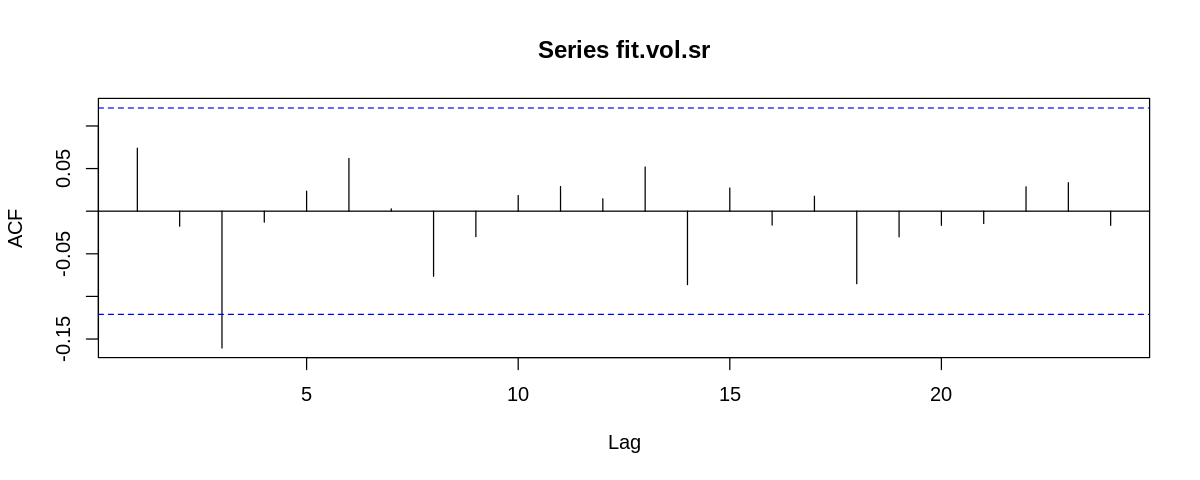


	Box-Ljung test

data:  fit.vol.sr
X-squared = 8.4151, df = 3, p-value = 0.03817


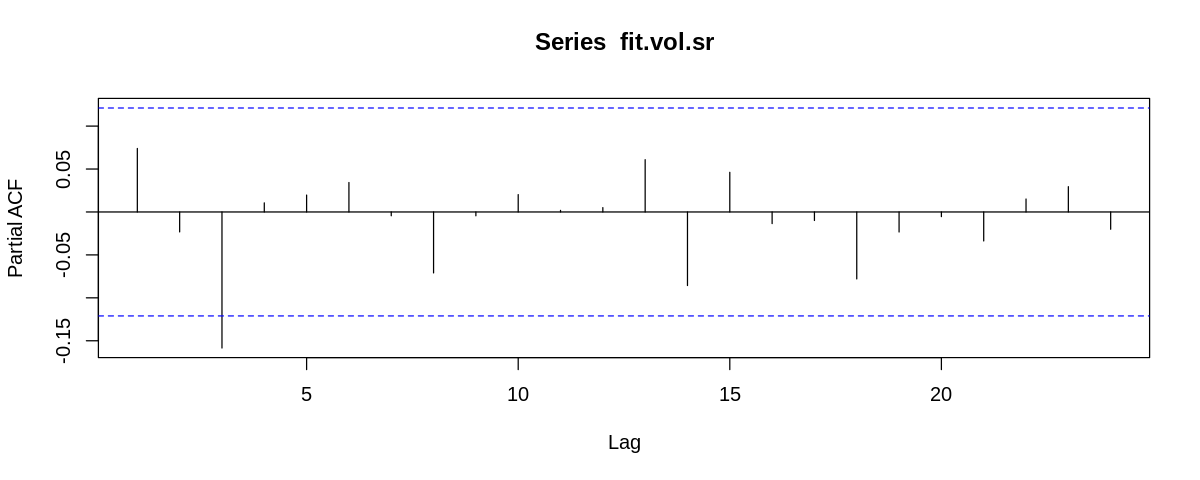

In [20]:
# check standardized residuals
acf(fit.vol.sr)
pacf(fit.vol.sr)
Box.test(fit.vol.sr, type="Ljung", lag=3)

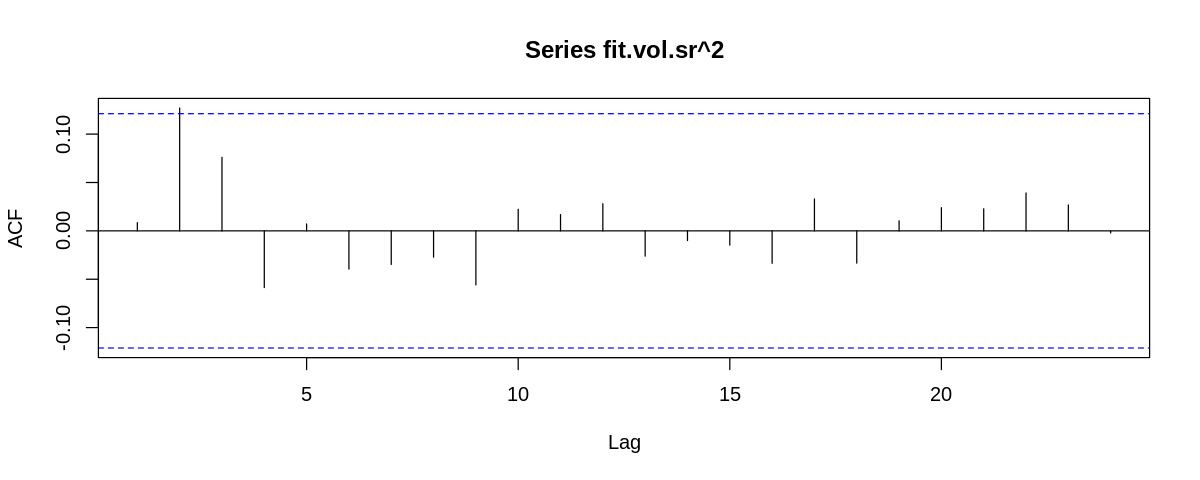


	Box-Ljung test

data:  fit.vol.sr^2
X-squared = 4.3102, df = 2, p-value = 0.1159


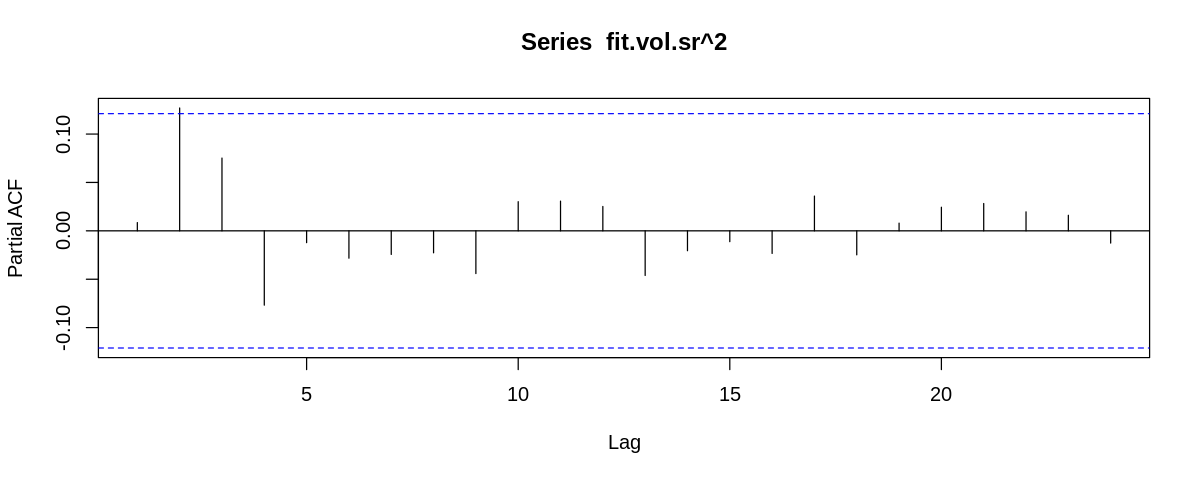

In [21]:
# check standardized squared residuals
acf(fit.vol.sr^2)
pacf(fit.vol.sr^2)
Box.test(fit.vol.sr^2, type="Ljung", lag=2)

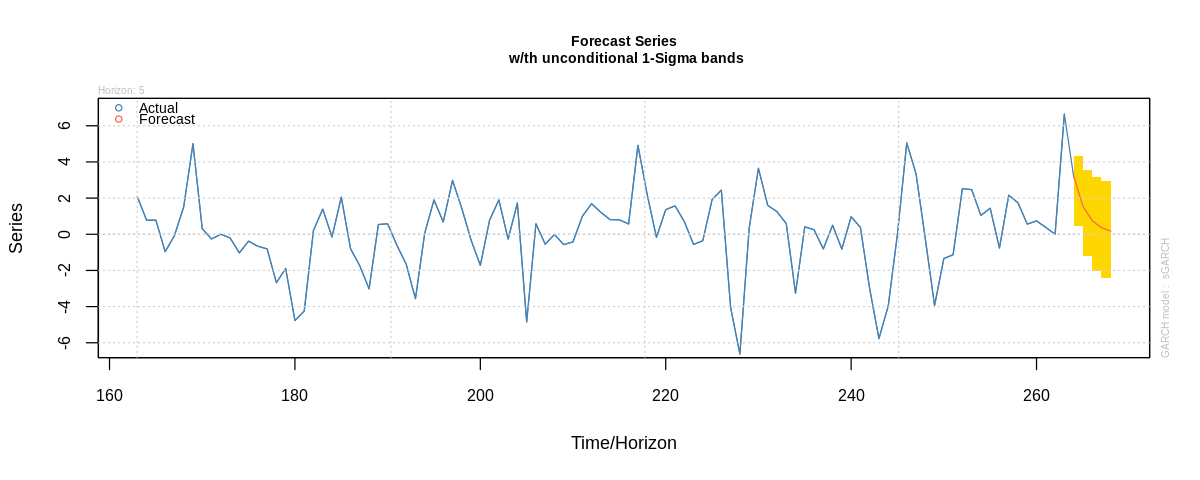

In [22]:
price.p <- ugarchforecast(fit_check, n.ahead = 5)
plot(price.p, which=1)